# 네이버 블로그 데이터로 시각화합니다.

## 시각화 공통사항
font : _G마켓산스Medium_OTF  
그래프 비율 : plt.figure(figsize=(10,6))  
그래프 비율(x축이 기울면) : plt.figure(figsize=(15, 10)) + plt.subplots_adjust(bottom=0.2)  
그래프 제목 : 삭제  
그래프 축 라벨 : 삭제  
그래프 색깔 : sns.color_palette("RdPu", 8) + sns.color_palette("Purples", 2) + sns.color_palette("Blues", 10) + 기준선  
x 축 기울기 : plt.xticks(rotation=45)  
배경색 투명하게 하기 : plt.savefig('./output/naver/scatter_naver.png', transparent = True)  
### 색 (cmap, color, hue, palette)
Seaborn 팔레트 https://hleecaster.com/python-seaborn-color/  

# 라이브러리

In [ ]:
import urllib.request
import json
import pandas as pd
import re
# 글에서 해당 키워드 찾기
from konlpy.tag import Kkma
# 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 트리맵
import squarify

# 폰트, 색 설정과 데이터 가져오기

In [ ]:
# 폰트 임시파일이 설치된 곳
# 새로 설치한 폰트가 적용이 안된다면 이곳의 임시파일 삭제하세요
matplotlib.get_cachedir()

In [ ]:
# 폰트설정
from matplotlib import font_manager, rc
font_path = "./data/font/21582067_G마켓산스Medium_OTF.otf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name() # rc 함수를 통해, rcParams에 사용되는 폰트의 정식명칭을 알 수 있음
print("폰트설정 :", font_name)
rc('font', family=font_name)
# 색깔 설정
my_colors = sns.color_palette("RdPu", 8) + sns.color_palette("Purples", 2) + sns.color_palette("Blues", 10)
my_colors2 = sns.color_palette("RdPu", 1) + sns.color_palette("Purples", 1) + sns.color_palette("Blues", 1)
# 데이터 가져오기
data = pd.read_csv("./data/naver_blog/total_power.csv")
display(data)

## 1. 산점도 그리기 : (resource - power3) (20 - (-? - ?))

In [ ]:
# 축 폰트 사이즈 설정
plt.rc('font', size=15)
# (resource - power3)산점도 그리기
plt.figure(figsize=(16, 9))
# seaborn
#이산형 변수의 분포 - 데이터 분산 고려 (중복 X) 
sns.swarmplot(x="resource",      #x축 변수
              y="power3",        #y축 변수
              data=data,
              palette=my_colors,
             size=6)   #데이터셋 - 데이터프레임

# matplotlib
# data.plot(kind='scatter', x='resource', y='power3', marker='+',
#         cmap='viridis', s=50, alpha=0.3, figsize=(20, 5))

plt.axvline(7.5, color='gray', linestyle='--', linewidth=2)
plt.axvline(9.5, color='gray', linestyle='--', linewidth=2)
plt.text(3.75, data["power3"].max() * 0.80, "연예인",       
         fontsize = 15, 
         color='gray',
         horizontalalignment='center')
plt.text(8.5, data["power3"].max() * 0.80, "유튜버",       
         fontsize = 15, 
         color='gray',
         horizontalalignment='center')
plt.text(14.75, data["power3"].max() * 0.80, "방송프로그램",       
         fontsize = 15, 
         color='gray',
         horizontalalignment='center')
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.ylabel(None)
plt.xlabel(None)
plt.savefig('./output/naver/scatter_naver.png', transparent = True)
plt.show()

## 2. 나무맵 : 블로그 게시물 개수(200개 아님)

In [ ]:
# 라이브러리 설치
# !pip install squarify

In [ ]:
# 나무맵 : 전수조사용
plt.figure(figsize=(16,8))
# 라벨 구하기
temp = data.copy()
#temp = temp.sort_values(by="blogTotal", ascending = False)
temp.loc[temp["blogTotal"] <= 250000,"restaurant"] = ""
squarify.plot(sizes=data["blogTotal"], label = temp["restaurant"], alpha=0.6)
plt.axis('off')
# plt.savefig('./output/naver/treemap_naver.png')
# plt.show()

In [ ]:
# 나무맵 : 항목별 5개씩
rastaurant = pd.read_excel("./data/음식점 모음.xlsx", sheet_name="Sheet1")
rastaurant = rastaurant.head(5)
temp = pd.DataFrame()
연예인 = ["이영자", "백종원", "성시경", "신동엽", "최자", "비(정지훈)", "문세윤", "김준현"]
유튜버 = ["더들리", "츄릅켠"]
방송프로그램 = ["수요미식회", "생생정보통", "전참시", "생활의 달인", "6시 내 고향", "골목식당", "생방송 오늘 저녁", "모닝 와이드", "맛있는 녀석들", "생방송 투데이"]
names = 연예인 + 유튜버 + 방송프로그램
for name in names:
    for i in range(len(rastaurant[name])):
        mask = (data["resource"] == name) & (data["restaurant"] == rastaurant[name][i])
        temp = temp.append(data.loc[mask].head(1))
# 라벨 구하기
temp.loc[temp["blogTotal"] <= 20000,"restaurant"] = ""
# 그래프 그리기
plt.figure(figsize=(16,8))
# # 색 지정하기
# # Create a dataset:
# my_values=[i**3 for i in range(1,100)]
#  # create a color palette, mapped to these values
# cmap = matplotlib.cm.Blues
# mini=min(my_values)
# maxi=max(my_values)
# norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
# colors = [cmap(norm(value)) for value in my_values]
# squarify.plot(sizes=temp["blogTotal"], label = temp["restaurant"], alpha=0.6, color=colors)
# 그래프 그리기
squarify.plot(sizes=temp["blogTotal"], label = temp["restaurant"], alpha=0.6)
plt.axis('off')
plt.savefig('./output/naver/treemap_naver.png', transparent = True)
plt.show()

## 3. 막대 그래프 그리기
* file : power3(사람별 - 해당 미디어의 영향력) power3값을 평균 사람별로(방송별) 막대그래프 (x-20개 y-(-?, ?))
* (사람별 - 영향력의 크기) reliability2값을 평균 사람별로(방송별) 막대그래프 (x-20개 y-(-?, ?))
* (사람별 - 글을 작성할 확률) reliability값을 평균 사람별로(방송별) 막대그래프 (x-20개 y-(-?, ?))

In [ ]:
# 데이터 가져오기
df1 = data.groupby("resource").mean()
# 자료 순서 맞추기
연예인 = ["이영자", "백종원", "성시경", "신동엽", "최자", "비(정지훈)", "문세윤", "김준현"]
유튜버 = ["더들리", "츄릅켠"]
방송프로그램 = ["수요미식회", "생생정보통", "전참시", "생활의 달인", "6시 내 고향", "골목식당", "생방송 오늘 저녁", "모닝 와이드", "맛있는 녀석들", "생방송 투데이"]
groups = 연예인 + 유튜버 + 방송프로그램
temp = pd.DataFrame()
for i, media in enumerate(groups):
    temp = temp.append(df1.loc[df1.index == media])
df1 = temp.copy()
# display(df1)

In [ ]:
# matplotlib
plt.figure(figsize=(16,9))
df1.resource_count.plot(kind='bar', color=my_colors)
# 기준선
plt.axvline(7.5, color='lightgray', linestyle='--', linewidth=2)
plt.axvline(9.5, color='lightgray', linestyle='--', linewidth=2)
# 구분 텍스트
plt.text(3.75, df1["resource_count"].max() * 0.80, "연예인",       
         fontsize = 15, 
         color='lightgray',
         horizontalalignment='center')
plt.text(8.5, df1["resource_count"].max() * 0.80, "유튜버",       
         fontsize = 15, 
         color='lightgray',
         horizontalalignment='center')
plt.text(14.75, df1["resource_count"].max() * 0.80, "방송프로그램",       
         fontsize = 15, 
         color='lightgray',
         horizontalalignment='center')
plt.xticks(rotation=45)
plt.xlabel(None)
plt.ylabel(None)
plt.subplots_adjust(bottom=0.2)
plt.show()

C:\Users\heee\anaconda3\envs\bigdata\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


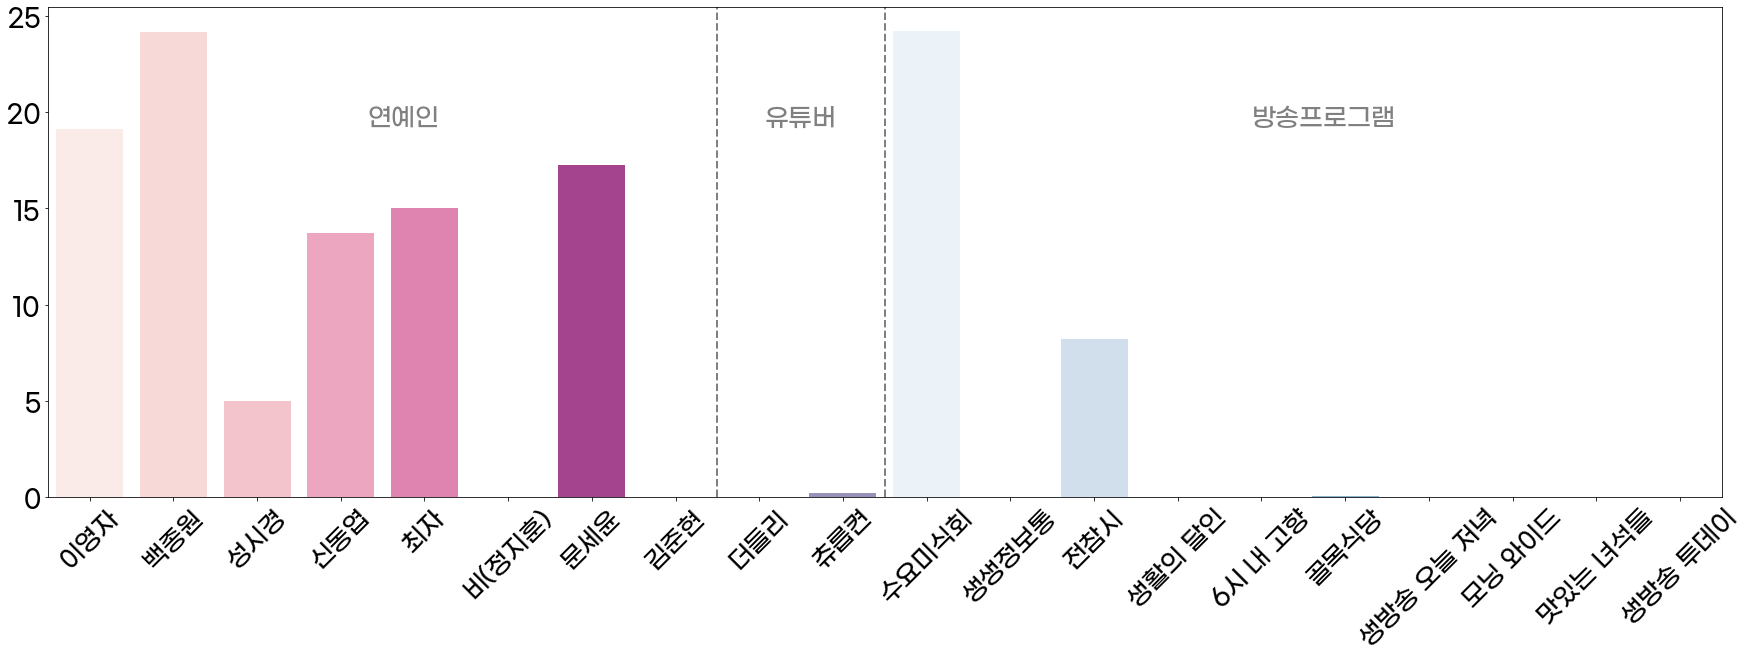

In [33]:
# seaborn
plt.rc('font', size=25)
plt.figure(figsize=(30,10))
sns.barplot(df1.index, df1.resource_count, palette=my_colors, alpha  = 0.8)
# 기준선
plt.axvline(7.5, color='gray', linestyle='--', linewidth=2)
plt.axvline(9.5, color='gray', linestyle='--', linewidth=2)
# 구분 텍스트
plt.text(3.75, df1["resource_count"].max() * 0.80, "연예인",       
         fontsize = 25, 
         color='gray',
         horizontalalignment='center')
plt.text(8.5, df1["resource_count"].max() * 0.80, "유튜버",       
         fontsize = 25, 
         color='gray',
         horizontalalignment='center')
plt.text(14.75, df1["resource_count"].max() * 0.80, "방송프로그램",       
         fontsize = 25, 
         color='gray',
         horizontalalignment='center')
plt.xticks(rotation=45)
plt.xlabel(None)
plt.ylabel(None)
plt.subplots_adjust(bottom=0.2)
plt.savefig('./output/naver/countmeanbyperson_naver.png', transparent = True)
plt.show()

In [ ]:
plt.figure(figsize=(30,10))

x = df1.index
y = df1.power3
my_color = np.where(y>=0, 'skyblue', 'orange')
plt.bar(x, y, color=my_color)

for i, v in enumerate(x):
    if df1.power3[i] > 0:
        plt.text(v, y[i], round(df1.reliability[i], 2),       
                 fontsize = 20, 
                 color='black',
                 horizontalalignment='center',  
                 verticalalignment='bottom') 
    else :
        plt.text(v, y[i], round(df1.reliability[i], 2),       
                 fontsize = 20, 
                 color='black',
                 horizontalalignment='center',  
                 verticalalignment='top')
# 구분선
plt.axvline(7.5, color='gray', linestyle='--', linewidth=2)
plt.axvline(9.5, color='gray', linestyle='--', linewidth=2)
# 구분 텍스트
plt.text(3.75, 19 * 0.80, "연예인",       
         fontsize = 25, 
         color='lightgray',
         horizontalalignment='center')
plt.text(8.5, 19 * 0.80, "유튜버",       
         fontsize = 25, 
         color='lightgray',
         horizontalalignment='center')
plt.text(14.75, 19 * 0.80, "방송프로그램",       
         fontsize = 25, 
         color='lightgray',
         horizontalalignment='center')
plt.ylim(-2,19)
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.savefig('./output/naver/powerBar_naver1.png', transparent = True)
plt.show()

<br>

## 4. 분산분석을 통하여 3개 이상의 집단 간에 차이가 존재하는지 분석하고자 함

가설1 : 미디어에 따라 파급력의 차이가 있는가?  
가설2 : 미디어에 따라 파급력을 미치는 크기에 차이가 있는가?  
가설3 : 미디어에 따라 글을 작성할 확률에 차이가 있는가?

<hr>

분산분석(미디어별 - 해당 미디어의 영향력) power값  
<p>분산분석(미디어별 - 영향력의 크기) reliability2값</p>
<p>분산분석(미디어별 - 글을 작성할 확률) reliability값</p>

In [ ]:
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

x1 = data.groupby("group").get_group('방송프로그램')
x1 = x1.power3
x2 = data.groupby("group").get_group('유튜버')
x2 = x2.power3
x3 = data.groupby("group").get_group('연예인')
x3 = x3.power3

In [ ]:
# 등분산 검증
print(stats.bartlett(x1,x2,x3),stats.levene(x1, x2, x3), sep="\n")

# 정규성 검증
print(stats.ks_2samp(x1, x2), stats.ks_2samp(x1, x3), stats.ks_2samp(x3, x2),  sep="\n")

#### 가설1 : 미디어에 따라 파급력의 차이가 있는가?

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 분산 분석

model = ols("data['power3'] ~ data['group']", data).fit()
display(anova_lm(model))

In [ ]:
# 집단 간의 차이가 유의할 경우, 어느 집단 간에 차이가 나타나는지 보다 구체적으로 보기 위하여 '사후 분석'을 실시
# 여기서는 봉페르니 방식의 교정과 Tukey HSD의 방법으로 사후분석
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(data['power3'], data['group'])
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf') # 봉페르니
print(result[0])

#투키의 HSD - Tuckey's Honestly Significant Difference = "진정으로 유의미한 차이"
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(data['power3'], data['group'], alpha=0.05)
hsd.summary()

In [ ]:
# 집단에 따른 분산
# df.boxplot(column = 'CNT', by = 'Ta_gubun', grid = False) : 간단히
plot_sp= [x1, x2, x3]
ax = plt.boxplot(plot_sp)
plt.show()

In [ ]:
# 집단에 따른 분산
# df.boxplot(column = 'CNT', by = 'Ta_gubun', grid = False) : 간단히
fig = plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
sns.boxplot(x=data["group"], y=data["power3"], palette=my_colors2)
plt.xlabel(None)
plt.ylabel(None)
plt.subplot(1,2,2)
sns.swarmplot(x="group",      #x축 변수
              y="power3",        #y축 변수
              data=data,
              palette=my_colors2)   #데이터셋 - 데이터프레임
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('./output/naver/ANOVA_naver1-2.png', transparent = True)
plt.show()

In [ ]:
x1 = data.groupby("group").get_group('방송프로그램')
x1 = x1.reliability
x2 = data.groupby("group").get_group('유튜버')
x2 = x2.reliability
x3 = data.groupby("group").get_group('연예인')
x3 = x3.reliability

In [ ]:
# 등분산 검증
print(stats.bartlett(x1,x2,x3),stats.levene(x1, x2, x3), sep="\n")

# 정규성 검증
print(stats.ks_2samp(x1, x2), stats.ks_2samp(x1, x3), stats.ks_2samp(x3, x2),  sep="\n")

#### 가설2 : 미디어에 따라 파급력을 미치는 크기에 차이가 있는가?

In [ ]:
model = ols("data['reliability'] ~ data['group']", data).fit()
anova_lm(model)

In [ ]:
# 집단 간의 차이가 유의할 경우, 어느 집단 간에 차이가 나타나는지 보다 구체적으로 보기 위하여 '사후 분석'을 실시
# 여기서는 봉페르니 방식의 교정과 Tukey HSD의 방법으로 사후분석
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(data['reliability'], data['group'])
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf') # 봉페르니
print(result[0])

#투키의 HSD - Tuckey's Honestly Significant Difference = "진정으로 유의미한 차이"
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(data['reliability'], data['group'], alpha=0.05)
hsd.summary()

In [ ]:
# 집단에 따른 분산

# df.boxplot(column = 'CNT', by = 'Ta_gubun', grid = False) : 간단히
plot_sp= [x1,x2, x3]

ax = plt.boxplot(plot_sp)
plt.savefig('./output/naver/ANOVA_naver2-1.png', transparent = True)
plt.show()

In [ ]:
# 집단에 따른 분산
# df.boxplot(column = 'CNT', by = 'Ta_gubun', grid = False) : 간단히
fig = plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
sns.boxplot(x=data["group"], y=data["reliability"], palette=my_colors2)
plt.xlabel(None)
plt.ylabel(None)
plt.subplot(1,2,2)
sns.swarmplot(x="group",      #x축 변수
              y="reliability",        #y축 변수
              data=data,
              palette=my_colors2)   #데이터셋 - 데이터프레임
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('./output/naver/ANOVA_naver2-2.png', transparent = True)
plt.show()

In [ ]:
x1 = data.groupby("group").get_group('방송프로그램')
x1 = x1.reliability2
x2 = data.groupby("group").get_group('유튜버')
x2 = x2.reliability2
x3 = data.groupby("group").get_group('연예인')
x3 = x3.reliability2

In [ ]:
# 등분산 검증
print(stats.bartlett(x1,x2,x3),stats.levene(x1, x2, x3), sep="\n")

# 정규성 검증
print(stats.ks_2samp(x1, x2), stats.ks_2samp(x1, x3), stats.ks_2samp(x3, x2),  sep="\n")

#### 가설3 : 미디어에 따라 글을 작성할 확률에 차이가 있는가?
등분산 검증 결과
: .05보다 크면 등분산을 이룬다고 볼 수 있고, 정규성을 이룬다고 볼 수 있음.

<hr>
bartlett의 검정 결과 p-value가 .05보다 커서, 등분산을 이룸
하지만, x3의 pvalue 값이 .05보다 작아 정규성을 이루지 않음

In [ ]:
model = ols("data['reliability2'] ~ data['group']", data).fit()
anova_lm(model)

In [ ]:
# 집단 간의 차이가 유의할 경우, 어느 집단 간에 차이가 나타나는지 보다 구체적으로 보기 위하여 '사후 분석'을 실시
# 여기서는 봉페르니 방식의 교정과 Tukey HSD의 방법으로 사후분석
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(data['reliability2'], data['group'])
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf') # 봉페르니
print(result[0])

#투키의 HSD - Tuckey's Honestly Significant Difference = "진정으로 유의미한 차이"
from statsmodels.stats.multicomp import pairwise_tukeyhsd
hsd = pairwise_tukeyhsd(data['reliability2'], data['group'], alpha=0.05)
hsd.summary()

In [ ]:
# 집단에 따른 분산

# df.boxplot(column = 'CNT', by = 'Ta_gubun', grid = False) : 간단히
plot_sp= [x1,x2, x3]

ax = plt.boxplot(plot_sp)
plt.savefig('./output/naver/ANOVA_naver3-1.png', transparent = True)
plt.show()

In [ ]:
# 집단에 따른 분산
# df.boxplot(column = 'CNT', by = 'Ta_gubun', grid = False) : 간단히
fig = plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
sns.boxplot(x=data["group"], y=data["reliability2"], palette=my_colors2)
plt.xlabel(None)
plt.ylabel(None)
plt.subplot(1,2,2)
sns.swarmplot(x="group",      #x축 변수
              y="reliability2",        #y축 변수
              data=data,
              palette=my_colors2)   #데이터셋 - 데이터프레임
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('./output/naver/ANOVA_naver3-2.png', transparent = True)
plt.show()

#### 분석 결과 해석
: Pr(>F)== p-value. 
<hr>  

##### 가설1 : 미디어에 따라 파급력의 차이가 있는가?

분산분석: p-value가 0.05보다 작으므로, 집단 간에 통계적으로 유의한 차이가 나타남
사후분석: pval의 값이 0.05보다 낮으므로, 방송프로그램과 유튜버 간의 차이가 유의하여 주효과가 나타난다.

##### 가설2 : 미디어에 따라 파급력을 미치는 크기에 차이가 있는가?

분산분석: p-value가 부동소수로 표현 될만큼 낮은 숫자이고, 0.05보다 작으므로 집단 간에 통계적으로 유의한 차이가 나타남
사후분석: pval의 값이 0.05보다 낮으므로, 방송프로그램과 연예인 간의 차이가 유의하여 주효과가 나타난다.
##### 가설3 : 미디어에 따라 글을 작성할 확률에 차이가 있는가?

분산분석: p-value가 부동소수로 표현 될만큼 낮은 숫자이고, 0.05보다 작으므로 집단 간에 통계적으로 유의한 차이가 나타남
사후분석: pval의 값이 0.05보다 낮으므로, 방송프로그램과 연예인 간의 차이가 유의하여 주효과가 나타난다.

### 5. 시계열 / 워드 클라우드(자주 사용하는 단어 찾기) 47- 하니칼국수 - 성시경 / 181-코카모메-츄릅켠 / 270-전참시-몽탄

In [ ]:
# 누적 히스토그램 + 히스토그램
lists = ["하니칼국수_성시경", "코카모메_츄릅켠", "몽탄_전참시"]
for item in lists:
    file = "./data/naver_blog/rowdata/" + item + ".csv"
    temp = pd.read_csv(file)
    temp.sort_values(by = "postdate", ascending=True, inplace=True)
    temp.postdate = pd.to_datetime(temp['postdate'])
    # 기간 나누기
    # temp['period'] = temp['postdate'].dt.to_period(freq='M')  # 년-월
    # 그래프 그리기
    plt.figure(figsize=(10,6))
    temp["test"] = 1
    plt.hist(temp["postdate"], weights=temp["test"], bins=10, cumulative = True, color="orange")
    plt.hist(temp["postdate"], weights=temp["test"], bins=10, cumulative = False, color="skyblue")
    plt.title(item + " 시계열 그래프")

In [ ]:
# 바그래프 + 라인그래프
plt.rc('font', size=15)
filelist = ["가쯔렛_츄릅켠", "다연닭갈비_생활의 달인", "디라이프스타일키친 광화문점_생활의 달인",
             "오죽이네_최자", "하니칼국수_성시경", "코카모메_츄릅켠", "몽탄_전참시"]
referenceDate = ['2099-12', '2099-12', "2099-12",
                '2018-07', '2021-05', '2021-08', '2021-03']
my_colors3 = ["Greens", "Blues", "Blues", "RdPu", "RdPu", "Greens", "Blues"]
my_colors4 = ["green", "royalblue", "royalblue", "purple", "purple", "green", "royalblue"]
for i in range(len(filelist)):
    file = "./data/naver_blog/rowdata/" + filelist[i] + ".csv"
    temp = pd.read_csv(file)
    temp.sort_values(by = "postdate", ascending=True, inplace=True)
    temp.postdate = pd.to_datetime(temp['postdate'])
    # 기간 나누기
    temp['period'] = temp['postdate'].dt.to_period(freq='M')  # 년-월
    # 기간별로 포스트 개수 세기
    period_count = temp.groupby("period").count()[["postdate"]]
    period_count.rename(columns = {"postdate": "count"}, inplace=True)
    # 누적합 열 추가하기
    period_count["cum"] = period_count[["count"]].cumsum()
    # 그래프 그리기
    plt.figure(figsize=(16,8))
    # 그래프를 그리기 위한 형변환
    period_count.index=period_count.index.to_series().astype(str)
    # 라인그래프 그리기
    plt.plot(period_count.index, period_count["cum"], marker='o', color=my_colors4[i])
    # 기준일 그리기
    if referenceDate[i] == "2099-12":
        plt.text(len(period_count) / 2, period_count["cum"].max() * 0.95, "게시물 없음",       
         fontsize = 15, 
         color='gray',
         horizontalalignment='center') 
    else:
        plt.axvline(referenceDate[i], color='gray', linestyle='--', linewidth=2)
        plt.text(referenceDate[i], period_count["cum"].max() * 0.95, "기준선",       
                 fontsize = 15, 
                 color='gray',
                 horizontalalignment='center') 
    # 바그래프 그리기
    plt.bar(period_count.index, period_count["count"], align='center', 
            color=sns.color_palette(my_colors3[i], len(period_count)))
    plt.xticks(rotation=45)
    plt.xlabel(None)
    plt.ylabel(None)
    if len(period_count) > 30 :
        plt.xticks(period_count.index, [period_count.index[j] if (j % (len(period_count)//20)) == 1 else "" for j in range(len(period_count))])
    plt.savefig('./output/naver/' + filelist[i] + ' 시계열 그래프_naver.png', transparent = True)
    plt.show()

# 문제모음

1. 인스턴스가 삭제가 안됩니다.
2. 파일 데이터를 불러올때 몇몇의 파일을 읽어오지 못합니다.
3. seaborn에서 한글 폰트를 인식하지 못합니다.

In [ ]:
# 폰트설정2
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# 폰트설정3
jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

# 폰트설정4
%matplotlib inline
import platform
path = './data/THEdog.ttf'
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unkonwn system... sorry~~~~')